https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508

Etapes :

- normalisation
- réduction dimensions
- apprentissage modèle
- graphe des frontières de décision

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries( X , y , model_class, **model_params ) :

    
    try:
        X = np.array( X )
        y = np.array( y ).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
        
    # Projection des données sur plan ( PCA ) :
    X_tmp = X.copy()
    
    scaler = StandardScaler()
    X_tmp = scaler.fit_transform( X_tmp )
    
    pca = PCA( n_components = 2 )
    reduced_data = pca.fit_transform( X_tmp )
    
    #reduced_data = X[ : , :2 ]
    
    # Instantiate the model object
    model = model_class( **model_params )
    
    # Fits the model with the reduced data
    model.fit( reduced_data , y )

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max] x [y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min , x_max = reduced_data[ : , 0 ].min() - 1, reduced_data[ : , 0 ].max() + 1
    y_min , y_max = reduced_data[ : , 1 ].min() - 1, reduced_data[ : , 1 ].max() + 1
    
    # Meshgrid creation
    xx , yy = np.meshgrid( np.arange( x_min , x_max , h ) , np.arange( y_min , y_max , h ) )

    # Obtain labels for each point in mesh using the model.
    Z = model.predict( np.c_[ xx.ravel() , yy.ravel() ] )    

    x_min , x_max = X[ : , 0 ].min() - 1, X[ : , 0 ].max() + 1
    y_min , y_max = X[ : , 1 ].min() - 1, X[ : , 1 ].max() + 1
    
    xx , yy = np.meshgrid( np.arange( x_min , x_max , 0.1 ) , np.arange( y_min , y_max , 0.1 ) )

    # Predictions to obtain the classification results
    Z = model.predict( np.c_[ xx.ravel() , yy.ravel() ] ).reshape( xx.shape )

    # Plotting
    plt.contourf( xx , yy , Z , alpha = 0.4 )
    plt.scatter( X[ : , 0 ] , X[ : , 1 ] , c = y , alpha = 0.8 )
    plt.xlabel( 'principal component 01' , fontsize = 15 )
    plt.ylabel( 'principal component 02' , fontsize = 15 )
    plt.xticks( fontsize = 14 )
    plt.yticks( fontsize = 14 )
    
    return plt

# Exemple

In [60]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000 , 
                           n_features = 10 , 
                           n_informative = 6 ,
                           n_redundant = 0 , 
                           n_repeated = 0 , 
                           n_classes = 2 ,
                           n_clusters_per_class = 1 ,
                           weights =[ 0.40 , 0.60 ] ,
                           class_sep = 1.0 , 
                           random_state = 0 )

<module 'matplotlib.pyplot' from 'C:\\Users\\FAB\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

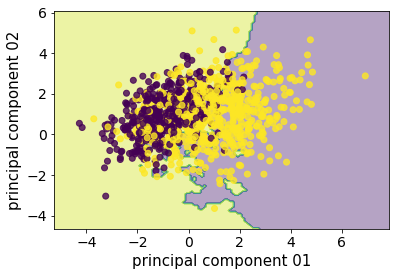

In [43]:
from sklearn.neighbors import KNeighborsClassifier

plot_decision_boundaries( X , y , KNeighborsClassifier , n_neighbors = 6 )

# Déroulé du code de la fonction

In [61]:
X_tmp = X.copy()
    
print( X_tmp )

X_tmp.shape

[[-0.76349625  0.75919774  1.5789884  ... -2.31615803  0.65003499
   0.4738663 ]
 [ 4.36370914  2.68428166  1.31348973 ...  0.53123641  0.00489475
   1.08568535]
 [-0.42196614  0.88210147  0.51275253 ...  0.41428663  0.40326043
   1.17716962]
 ...
 [-1.24412438  2.45156822 -0.78880087 ... -0.07397232 -0.09690751
  -0.73261044]
 [-0.40171627 -1.74719651  2.96530599 ... -0.73360003  0.54681301
   2.91217138]
 [ 1.39599747 -0.03296791 -0.21353727 ... -2.08145301 -1.85173841
   1.15909368]]


(1000, 10)

In [63]:
scaler = StandardScaler()

X_tmp = scaler.fit_transform( X_tmp )

print( X_tmp )

[[-5.87502267e-01 -1.69789196e-01  3.87804414e-01 ... -9.31250059e-01
   6.49535842e-01 -3.98346155e-01]
 [ 2.49466827e+00  1.35693967e+00  2.12055165e-01 ...  1.10935709e+00
   1.16805341e-03  7.02308387e-02]
 [-3.82194704e-01 -7.23177720e-02 -3.18000091e-01 ...  1.02554413e+00
   4.01526703e-01  1.40296362e-01]
 ...
 [-8.76427282e-01  1.17238131e+00 -1.17957516e+00 ...  6.75629596e-01
  -1.01143508e-01 -1.32235668e+00]
 [-3.70021688e-01 -2.15753861e+00  1.30548992e+00 ...  2.02902316e-01
   5.45797452e-01  1.46909105e+00]
 [ 7.10656752e-01 -7.98033061e-01 -7.98774207e-01 ... -7.63046899e-01
  -1.86475357e+00  1.26452450e-01]]


In [59]:
X_tmp.shape

(1000, 10)